# This script generates csv with key information from markwotiz portfolio allocation

### Link to the Tableau Dashboard: https://public.tableau.com/views/All-ETFPortfolioOptimizer/All-ETFPortfolioOptimizer?:language=en-US&:display_count=n&:origin=viz_share_link

### Inspired by : https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/

In [28]:
import pandas as pd
import numpy as np, numpy.random
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('etf_price_data.csv')

### Data generated from vanguard_etf_Data_pull.ipynb

In [30]:
df

,Open,High,Low,Close,Volume,Ticker,Date
0,104.346624,104.346624,102.709849,103.238121,86200,EDV,2018-01-02
1,103.619171,103.861655,103.238120,103.688454,38800,EDV,2018-01-03
2,103.471955,103.913620,103.056263,103.870323,33200,EDV,2018-01-04
3,103.489255,103.792360,102.952321,103.385330,45500,EDV,2018-01-05
4,103.679785,103.714427,102.874388,103.168831,48200,EDV,2018-01-08
...,...,...,...,...,...,...,...
80795,161.600006,161.779999,157.399994,159.949997,359000,VPU,2022-04-25
80796,159.360001,161.250000,158.419998,158.449997,208400,VPU,2022-04-26
80797,158.729996,159.889999,157.289993,157.589996,732300,VPU,2022-04-27
80798,158.520004,159.929993,157.679993,159.440002,491000,VPU,2022-04-28


In [31]:
df = df[['Date','Ticker','Close']]
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-31-4741e53c026c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [32]:
df

,Date,Ticker,Close
0,2018-01-02,EDV,103.238121
1,2018-01-03,EDV,103.688454
2,2018-01-04,EDV,103.870323
3,2018-01-05,EDV,103.385330
4,2018-01-08,EDV,103.168831
...,...,...,...
80795,2022-04-25,VPU,159.949997
80796,2022-04-26,VPU,158.449997
80797,2022-04-27,VPU,157.589996
80798,2022-04-28,VPU,159.440002


In [33]:
ticker_list = df['Ticker'].unique()
print(ticker_list)

['EDV' 'BIV' 'VGIT' 'BLV' 'VGLT' 'VMBS' 'BSV' 'VTIP' 'VGSH' 'BND' 'VCEB'
 'VCIT' 'VCLT' 'VCSH' 'VTC' 'VUSB' 'VTEB' 'VIG' 'ESGV' 'VUG' 'VYM' 'VV'
 'MGC' 'MGK' 'MGV' 'VONE' 'VONG' 'VONV' 'VTHR' 'VOO' 'VOOG' 'VOOV' 'VTI'
 'VTV' 'VXF' 'VO' 'VOT' 'VOE' 'IVOO' 'IVOG' 'IVOV' 'VTWO' 'VTWG' 'VTWV'
 'VIOO' 'VIOG' 'VIOV' 'VB' 'VBK' 'VBR' 'BNDW' 'BNDX' 'VWOB' 'VT' 'VSGX'
 'VEU' 'VSS' 'VEA' 'VGK' 'VPL' 'VNQI' 'VIGI' 'VYMI' 'VXUS' 'VWO' 'VOX'
 'VCR' 'VDC' 'VDE' 'VFH' 'VHT' 'VIS' 'VGT' 'VAW' 'VNQ' 'VPU']


In [34]:
widedf = df.pivot_table(index=["Date"], columns='Ticker', values='Close')

In [35]:
widedf

Ticker,BIV,BLV,BND,BNDW,BNDX,BSV,EDV,ESGV,IVOG,IVOO,...,VTWV,VUG,VUSB,VV,VWO,VWOB,VXF,VXUS,VYM,VYMI
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,73.712158,78.819397,72.953186,NaN,48.423561,73.094826,103.238121,NaN,129.872635,121.763039,...,102.212753,137.019394,NaN,114.775017,41.791470,66.735085,106.798500,51.016796,75.060524,57.182915
2018-01-03,73.791550,79.112343,73.015930,NaN,48.459259,73.104042,103.688454,NaN,130.433395,121.998886,...,102.231339,138.300491,NaN,115.509270,42.194172,66.801476,107.035416,51.372444,75.305107,57.449139
2018-01-04,73.791550,79.187691,72.980080,NaN,48.468174,73.048576,103.870323,NaN,131.061829,122.357422,...,102.463722,138.676163,NaN,115.992584,42.453693,66.809738,107.310211,51.799206,75.637100,58.036514
2018-01-05,73.694481,79.003517,72.881393,NaN,48.468174,73.057800,103.385330,NaN,131.854614,122.876335,...,102.631058,139.841690,NaN,116.736107,42.829544,66.901062,107.689217,52.145962,75.977791,58.315422
2018-01-08,73.659225,78.986816,72.890366,NaN,48.477100,73.048576,103.168831,NaN,132.492706,123.442383,...,103.012146,140.294342,NaN,116.996353,42.838501,66.743347,108.001915,52.119289,76.117561,58.188644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,79.019997,84.470001,76.779999,72.070000,51.230000,77.190002,108.269997,76.300003,184.320007,175.309998,...,135.380005,262.899994,49.310001,196.830002,43.130001,66.550003,155.330002,56.619999,110.690002,64.800003
2022-04-26,79.360001,84.750000,76.980003,72.150002,51.320000,77.379997,109.440002,73.849998,178.630005,170.199997,...,132.059998,252.559998,49.340000,191.149994,42.259998,66.279999,150.009995,55.169998,108.889999,63.320000
2022-04-27,79.010002,83.730003,76.739998,71.910004,51.169998,77.290001,107.779999,73.919998,178.949997,170.399994,...,131.500000,253.139999,49.349998,191.449997,42.849998,65.949997,149.740005,55.540001,109.050003,63.650002


In [36]:
def log_returns(ticker_list):
    list_of_returns_df = []
    
    for i in ticker_list:
        df = widedf[i].pct_change().apply(lambda x: np.log(1+x))
        list_of_returns_df.append(df)
    
    main_df = pd.concat(list_of_returns_df,axis = 1)
    
    return main_df

In [37]:
return_df = log_returns(ticker_list)

In [38]:
return_df = return_df.iloc[1:]
return_df

,EDV,BIV,VGIT,BLV,VGLT,VMBS,BSV,VTIP,VGSH,BND,...,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.004353,0.001076,0.000313,0.003710,0.004009,0.000000,0.000126,0.000205,-0.000498,0.000860,...,0.005048,-0.001032,0.015075,0.003139,0.009883,0.003273,0.010366,0.006534,-0.002907,-0.008078
2018-01-04,0.001752,0.000000,-0.000784,0.000952,0.000516,-0.000190,-0.000759,0.000205,-0.000332,-0.000491,...,0.002389,0.003232,0.005364,0.010485,0.000254,0.007480,0.005732,0.006633,-0.017377,-0.007880
2018-01-05,-0.004680,-0.001316,-0.000627,-0.002328,-0.003229,0.000000,0.000126,-0.000205,0.000166,-0.001353,...,0.008006,0.003359,-0.000292,0.002674,0.007835,0.005573,0.010610,0.008071,0.000494,-0.000176
2018-01-08,-0.002096,-0.000479,-0.000628,-0.000211,-0.001036,-0.000573,-0.000126,-0.000205,0.000166,0.000123,...,0.001556,0.003006,0.005627,-0.001407,-0.004795,0.004382,0.004770,0.001762,0.005169,0.008928
2018-01-09,-0.018383,-0.002158,-0.002357,-0.009689,-0.013169,-0.002676,-0.000506,0.000000,-0.000664,-0.002957,...,0.001119,-0.001434,-0.002228,0.008131,0.012319,0.004090,-0.002557,-0.003950,-0.012972,-0.010071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,0.011706,0.004820,0.004073,0.012748,0.009254,0.008084,0.002465,-0.000592,0.001187,0.006271,...,0.010213,0.004150,-0.032955,0.001816,0.007186,0.001080,0.016184,-0.004411,-0.002554,-0.008343
2022-04-26,0.010748,0.004294,0.005028,0.003309,0.009304,0.003092,0.002458,0.001183,0.001862,0.002602,...,-0.048222,-0.016407,0.000097,-0.026659,-0.021839,-0.023748,-0.038818,-0.018656,-0.016578,-0.009422
2022-04-27,-0.015284,-0.004420,-0.002754,-0.012108,-0.011202,-0.000412,-0.001164,0.000394,-0.000677,-0.003123,...,-0.000431,0.003263,0.014801,-0.001748,-0.001893,0.002207,0.010703,0.014493,-0.006615,-0.005442


In [39]:
cov_matrix = return_df.pct_change().apply(lambda x: np.log(1+x)).cov()

C:\Users\kevin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kevin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
cov_matrix

,EDV,BIV,VGIT,BLV,VGLT,VMBS,BSV,VTIP,VGSH,BND,...,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU
EDV,1.724910,0.631289,0.750063,0.988292,1.380317,0.360542,0.302644,0.107962,0.235132,0.825707,...,0.027243,0.039680,0.153326,0.259688,-0.140027,0.166916,0.144580,0.013942,0.072615,0.059658
BIV,0.631289,1.963179,0.959338,0.932236,0.760907,0.590507,0.710561,0.175805,0.472764,0.964432,...,0.149201,-0.149960,0.270431,0.375849,-0.032192,0.194193,-0.051522,0.119962,0.166723,0.240909
VGIT,0.750063,0.959338,1.543493,0.747632,0.787785,0.589321,0.680951,0.348081,0.483234,0.825646,...,0.012001,-0.105087,0.393219,0.473660,0.024753,0.239636,0.176248,0.196046,0.029805,0.051870
BLV,0.988292,0.932236,0.747632,1.965887,1.032428,0.501963,0.440556,0.061973,0.210574,1.054526,...,0.080146,0.012514,0.132786,0.356292,-0.026237,0.160607,0.093867,0.015457,0.084289,0.105104
VGLT,1.380317,0.760907,0.787785,1.032428,2.001972,0.418469,0.445359,-0.005876,0.248169,0.803843,...,-0.100296,-0.115448,0.138756,0.287961,0.056130,0.166010,0.140772,0.109423,0.030370,0.015953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIS,0.166916,0.194193,0.239636,0.160607,0.166010,0.020950,0.054794,0.057149,-0.081452,0.046256,...,0.676043,0.675055,0.496878,0.987411,0.421867,2.441453,0.683233,0.848216,0.288569,0.293272
VGT,0.144580,-0.051522,0.176248,0.093867,0.140772,0.058572,0.037745,0.233655,-0.170826,-0.023230,...,0.931251,0.334607,0.315328,0.459715,0.751621,0.683233,2.524034,0.581114,0.207751,0.045865
VAW,0.013942,0.119962,0.196046,0.015457,0.109423,-0.083153,0.182969,0.045612,0.085560,0.038180,...,0.431420,0.286967,0.478214,0.822533,0.312582,0.848216,0.581114,2.005979,0.233662,0.126840
VNQ,0.072615,0.166723,0.029805,0.084289,0.030370,0.014395,0.123302,0.164064,0.206917,0.250356,...,0.330044,0.525391,0.303371,0.309083,0.450239,0.288569,0.207751,0.233662,2.141903,0.333721


In [14]:
corr_matrix = return_df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

C:\Users\kevin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kevin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,EDV,BIV,VGIT,BLV,VGLT,VMBS,BSV,VTIP,VGSH,BND,...,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU
EDV,1.000000,0.435436,0.539210,0.670308,0.879680,0.308448,0.240507,0.078226,0.173169,0.609835,...,0.014492,0.020349,0.080409,0.153640,-0.061535,0.083090,0.067784,0.007774,0.041108,0.029758
BIV,0.435436,1.000000,0.662681,0.558565,0.464781,0.437935,0.553921,0.119450,0.410579,0.640169,...,0.071833,-0.066828,0.127929,0.192173,-0.014629,0.091621,-0.022588,0.061593,0.085347,0.111782
VGIT,0.539210,0.662681,1.000000,0.503795,0.516509,0.486962,0.584650,0.260506,0.462099,0.628718,...,0.007196,-0.055455,0.203105,0.270971,0.012395,0.119683,0.090517,0.109607,0.018049,0.027357
BLV,0.670308,0.558565,0.503795,1.000000,0.650470,0.370254,0.329831,0.043777,0.179674,0.700481,...,0.041682,0.006035,0.060986,0.181454,-0.011641,0.073921,0.039679,0.007779,0.042999,0.050167
VGLT,0.879680,0.464781,0.516509,0.650470,1.000000,0.308275,0.324627,-0.003980,0.183959,0.565003,...,-0.046869,-0.057655,0.068200,0.162255,0.023961,0.073682,0.058725,0.053156,0.016241,0.007079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIS,0.083090,0.091621,0.119683,0.073921,0.073682,0.012878,0.032918,0.032820,-0.059901,0.024451,...,0.356460,0.341361,0.228260,0.528840,0.187340,1.000000,0.283444,0.462917,0.155057,0.125524
VGT,0.067784,-0.022588,0.090517,0.039679,0.058725,0.038397,0.021796,0.125857,-0.115896,-0.011672,...,0.475550,0.151017,0.131691,0.219775,0.337611,0.283444,1.000000,0.289114,0.090532,0.017533
VAW,0.007774,0.061593,0.109607,0.007779,0.053156,-0.053268,0.114020,0.028858,0.060979,0.020570,...,0.256494,0.151294,0.236698,0.457280,0.155676,0.462917,0.289114,1.000000,0.131730,0.060067
VNQ,0.041108,0.085347,0.018049,0.042999,0.016241,0.009642,0.078052,0.098598,0.166627,0.141280,...,0.162459,0.255705,0.137827,0.155219,0.210606,0.155057,0.090532,0.131730,1.000000,0.158714


### I use Vanguard's listed annual returns instead of calculating it from the sample data dated 1/1/2018 - 4/30/2022 since 2020 was an outlier year in terms of performance for many stocks

In [15]:
etf_df = pd.read_csv('vanguard_etfs.csv')
etf_df = etf_df[['Ticker','total annual returns']]

In [25]:
etf_series

Ticker
EDV     0.0687
BIV     0.0439
VGIT    0.0239
BLV     0.0614
VGLT    0.0525
         ...  
VIS     0.0996
VGT     0.1327
VAW     0.0989
VNQ     0.0926
VPU     0.1032
Length: 76, dtype: float64

In [ ]:
etf_series = pd.Series(etf_df['total annual returns'].values, index=etf_df['Ticker'])

### I do use the sample data for the annual standard deviation to calculate volatility

In [23]:
ann_sd = return_df.apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

EDV     0.189958
BIV     0.048754
VGIT    0.037476
BLV     0.121239
VGLT    0.140945
          ...   
VIS     0.244997
VGT     0.272983
VAW     0.248168
VNQ     0.249654
VPU     0.223543
Length: 76, dtype: float64

In [24]:
return_df

,EDV,BIV,VGIT,BLV,VGLT,VMBS,BSV,VTIP,VGSH,BND,...,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.004353,0.001076,0.000313,0.003710,0.004009,0.000000,0.000126,0.000205,-0.000498,0.000860,...,0.005048,-0.001032,0.015075,0.003139,0.009883,0.003273,0.010366,0.006534,-0.002907,-0.008078
2018-01-04,0.001752,0.000000,-0.000784,0.000952,0.000516,-0.000190,-0.000759,0.000205,-0.000332,-0.000491,...,0.002389,0.003232,0.005364,0.010485,0.000254,0.007480,0.005732,0.006633,-0.017377,-0.007880
2018-01-05,-0.004680,-0.001316,-0.000627,-0.002328,-0.003229,0.000000,0.000126,-0.000205,0.000166,-0.001353,...,0.008006,0.003359,-0.000292,0.002674,0.007835,0.005573,0.010610,0.008071,0.000494,-0.000176
2018-01-08,-0.002096,-0.000479,-0.000628,-0.000211,-0.001036,-0.000573,-0.000126,-0.000205,0.000166,0.000123,...,0.001556,0.003006,0.005627,-0.001407,-0.004795,0.004382,0.004770,0.001762,0.005169,0.008928
2018-01-09,-0.018383,-0.002158,-0.002357,-0.009689,-0.013169,-0.002676,-0.000506,0.000000,-0.000664,-0.002957,...,0.001119,-0.001434,-0.002228,0.008131,0.012319,0.004090,-0.002557,-0.003950,-0.012972,-0.010071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,0.011706,0.004820,0.004073,0.012748,0.009254,0.008084,0.002465,-0.000592,0.001187,0.006271,...,0.010213,0.004150,-0.032955,0.001816,0.007186,0.001080,0.016184,-0.004411,-0.002554,-0.008343
2022-04-26,0.010748,0.004294,0.005028,0.003309,0.009304,0.003092,0.002458,0.001183,0.001862,0.002602,...,-0.048222,-0.016407,0.000097,-0.026659,-0.021839,-0.023748,-0.038818,-0.018656,-0.016578,-0.009422
2022-04-27,-0.015284,-0.004420,-0.002754,-0.012108,-0.011202,-0.000412,-0.001164,0.000394,-0.000677,-0.003123,...,-0.000431,0.003263,0.014801,-0.001748,-0.001893,0.002207,0.010703,0.014493,-0.006615,-0.005442


In [25]:
assets = pd.concat([etf_series, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
EDV,0.0687,0.189958
BIV,0.0439,0.048754
VGIT,0.0239,0.037476
BLV,0.0614,0.121239
VGLT,0.0525,0.140945
...,...,...
VIS,0.0996,0.244997
VGT,0.1327,0.272983
VAW,0.0989,0.248168
VNQ,0.0926,0.249654


### Generating 50000 portfolios with random weights

In [26]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(return_df.columns)
num_portfolios = 50000

In [27]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, etf_series)
    
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [28]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(return_df.columns.tolist()):
    #print(counter, symbol)
    data[symbol +' weight'] = [w[counter] for w in p_weights]

In [29]:
portfolios  = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,EDV weight,BIV weight,VGIT weight,BLV weight,VGLT weight,VMBS weight,BSV weight,VTIP weight,...,VCR weight,VDC weight,VDE weight,VFH weight,VHT weight,VIS weight,VGT weight,VAW weight,VNQ weight,VPU weight
0,0.085601,11.231641,0.017909,0.021135,0.009004,0.013423,0.020406,0.005698,0.025141,0.005414,...,0.023249,0.019504,0.024609,0.012331,0.016614,0.003099,0.005937,0.000153,0.008994,0.018171
1,0.085076,11.567541,0.004095,0.014787,0.002365,0.008919,0.010762,0.001215,0.011803,0.010405,...,0.014418,0.011093,0.012462,0.027345,0.010788,0.017604,0.018407,0.008609,0.024942,0.017626
2,0.079146,11.033852,0.009011,0.016616,0.007996,0.015744,0.015989,0.009904,0.012489,0.023184,...,0.014319,0.008203,0.024408,0.011467,0.003228,0.022772,0.011221,0.006249,0.008842,0.019110
3,0.080127,11.239124,0.003410,0.007815,0.006036,0.019642,0.016149,0.021996,0.019583,0.009120,...,0.019606,0.015413,0.017239,0.022835,0.001662,0.012261,0.000959,0.021525,0.000151,0.019048
4,0.082438,10.993125,0.022072,0.021540,0.022269,0.027526,0.014199,0.009369,0.022655,0.012698,...,0.010371,0.024971,0.006700,0.000188,0.002276,0.013785,0.014500,0.000832,0.002875,0.025677


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

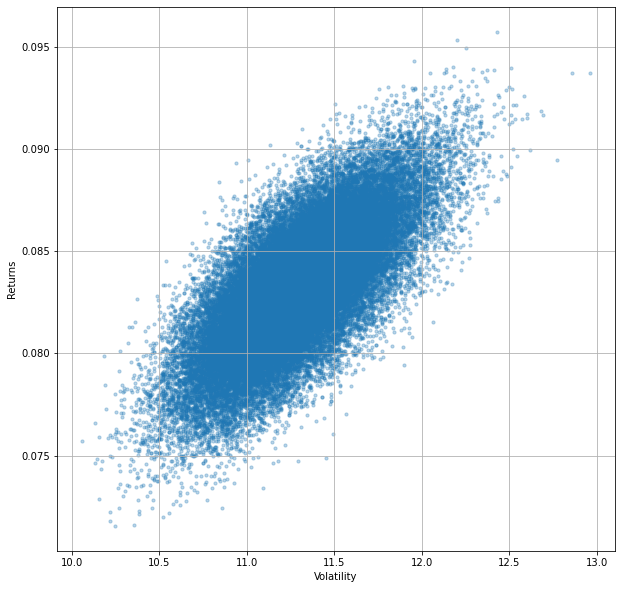

In [31]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [32]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.075721
Volatility     10.061356
EDV weight      0.017542
BIV weight      0.021357
VGIT weight     0.021243
                 ...    
VIS weight      0.021492
VGT weight      0.015317
VAW weight      0.001964
VNQ weight      0.015425
VPU weight      0.004237
Name: 21304, Length: 78, dtype: float64

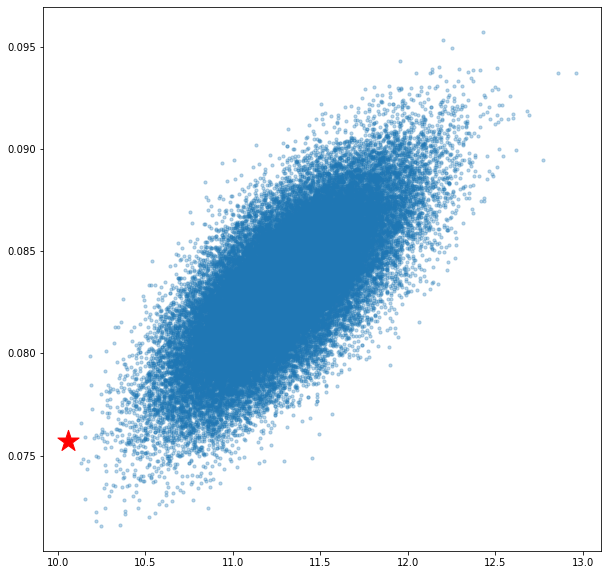

In [33]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

### Note: The Name of the optimal_risky_port and min_vol_port (47051 and 12069 respectively) are hardcoded into the Tableau dashboard and correspond to portfolio number within the dashboard.

Rerunning the script will generate different portfolio numbers for these two portfolios, and the dashboard would have to be refiltered to display these portfolios

In [34]:
rf = 0.01
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.089328
Volatility     10.939741
EDV weight      0.021134
BIV weight      0.015201
VGIT weight     0.011200
                 ...    
VIS weight      0.021570
VGT weight      0.029922
VAW weight      0.014456
VNQ weight      0.026372
VPU weight      0.024003
Name: 47051, Length: 78, dtype: float64

In [198]:
min_vol_port

Returns        0.073628
Volatility     9.934785
EDV weight     0.022126
BIV weight     0.003285
VGIT weight    0.025103
                 ...   
VIS weight     0.021817
VGT weight     0.007026
VAW weight     0.023179
VNQ weight     0.020575
VPU weight     0.027791
Name: 12069, Length: 78, dtype: float64

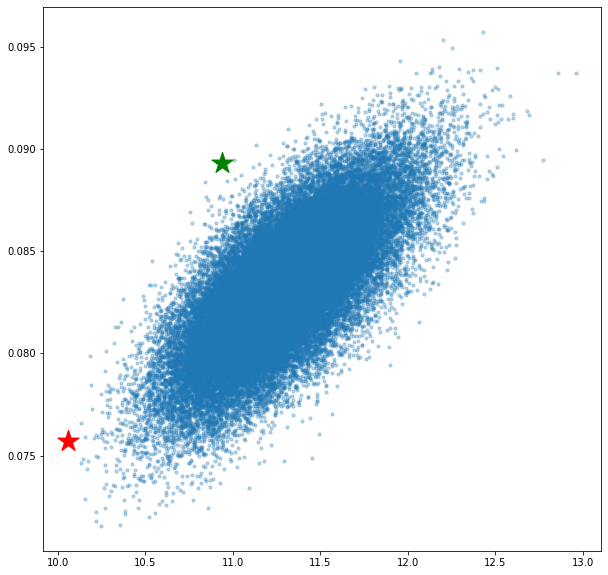

In [35]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

### Save csv files for Tableau Dashboard

In [36]:
portfolios.to_csv('Portfolios.csv')

In [199]:
min_vol_port.to_csv('Minimum_volatility_portfolio.csv',header = False)

In [200]:
optimal_risky_port.to_csv('Optimal_risky_portfolio.csv',header = False)

In [192]:
#manually add ticker header
assets.to_csv('Asset_list_with_kpis.csv')

In [194]:
cov_matrix.to_csv('etf_covariance_matrix.csv')

In [195]:
corr_matrix.to_csv('etf_correlation_matrix.csv')